<a href="https://colab.research.google.com/github/NanThanThanSoe/OfflineHandwrittenRecognition/blob/master/MLFianlExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Final Exam
- By Nan Than Than Soe

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, Conv2D, Flatten, MaxPool2D, Dropout
import keras.utils
from keras import utils as np_utils
from keras.utils import to_categorical
from keras.optimizers import Adam
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [0]:
train_feature = pd.read_csv("/content/Flu Shot Learning - training_set_features.csv", index_col=0)
train_label = pd.read_csv("/content/Flu Shot Learning - training_set_labels.csv", index_col=0)
test_feature = pd.read_csv("/content/Flu Shot Learning - test_set_features.csv", index_col=0)

In [116]:
train_label.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [117]:
train_label.describe()

,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26707.000000
mean,0.212454,0.465608
std,0.409052,0.498825
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,1.000000,1.000000


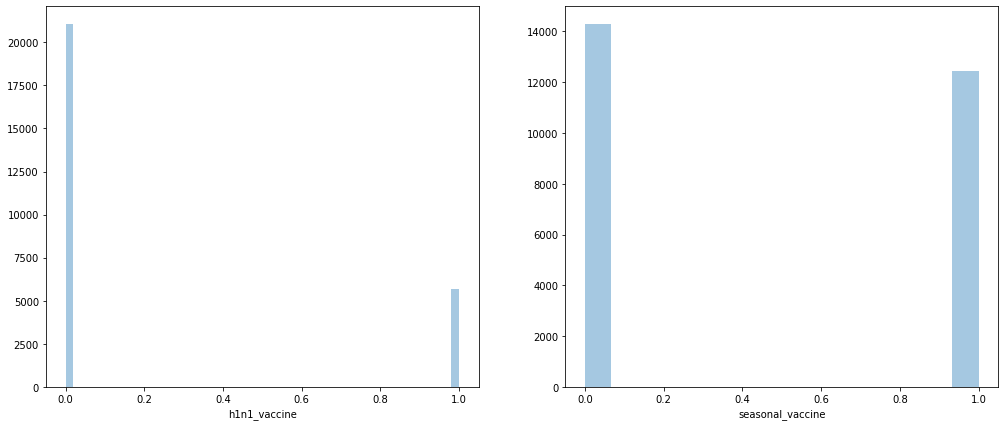

In [118]:
plt.figure(figsize=(15*3,7), constrained_layout=False)
plt.subplot(151);sns.distplot(a = train_label['h1n1_vaccine'], kde=False)
plt.subplot(152);sns.distplot(a = train_label['seasonal_vaccine'], kde=False)

In [119]:
pd.crosstab(train_label['h1n1_vaccine'],train_label['seasonal_vaccine'],margins=True,normalize=True)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [120]:
label_corr = train_label['h1n1_vaccine'].corr(train_label['seasonal_vaccine'], method='pearson')
print(label_corr)

0.37714265306144495


In [121]:
train_feature.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [122]:
train_feature.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000


In [123]:
data = pd.merge(train_feature, train_label,left_index=True, right_index=True)
data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [124]:
data[['h1n1_concern', 'h1n1_vaccine']].groupby(['h1n1_concern', 'h1n1_vaccine']).size().unstack('h1n1_vaccine')

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


In [125]:
h1n1_corr = data['h1n1_vaccine'].corr(data['h1n1_concern'], method='pearson')
print(h1n1_corr)

0.12192918865076169


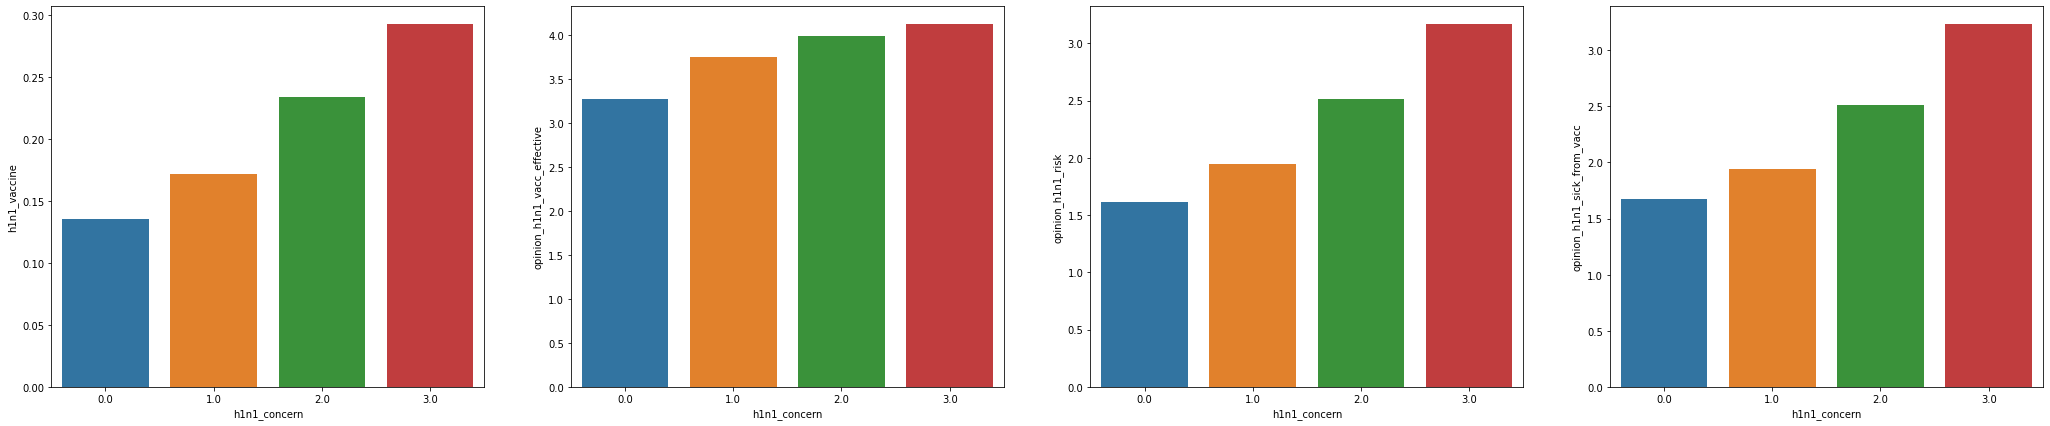

In [126]:
plt.figure(figsize=(15*3,7), constrained_layout=False)
plt.subplot(151); sns.barplot(x = data['h1n1_concern'], y = data['h1n1_vaccine'], ci = None)
plt.subplot(152); sns.barplot(x = data['h1n1_concern'], y = data['opinion_h1n1_vacc_effective'], ci = None)
plt.subplot(153); sns.barplot(x = data['h1n1_concern'], y = data['opinion_h1n1_risk'], ci = None)
plt.subplot(154); sns.barplot(x = data['h1n1_concern'], y = data['opinion_h1n1_sick_from_vacc'], ci = None)

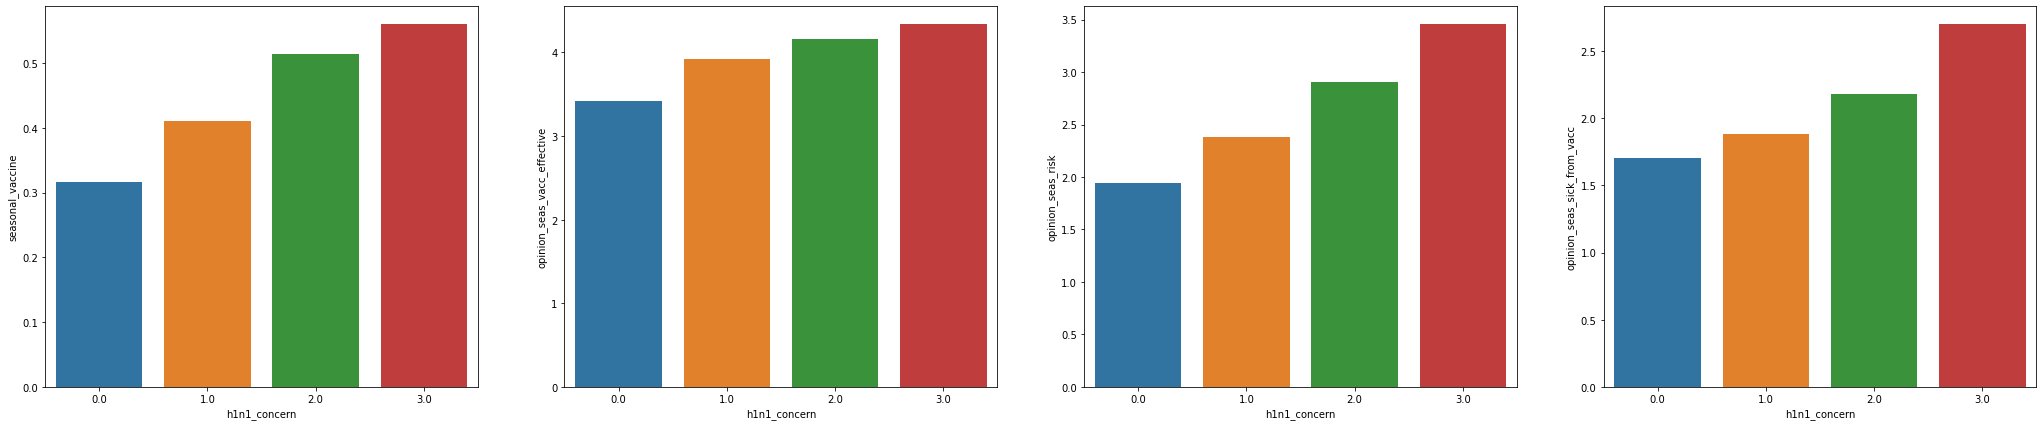

In [127]:
plt.figure(figsize=(15*3,7), constrained_layout=False)
plt.subplot(151); sns.barplot(x = data['h1n1_concern'], y = data['seasonal_vaccine'], ci = None)
plt.subplot(152); sns.barplot(x = data['h1n1_concern'], y = data['opinion_seas_vacc_effective'], ci = None)
plt.subplot(153); sns.barplot(x = data['h1n1_concern'], y = data['opinion_seas_risk'], ci = None)
plt.subplot(154); sns.barplot(x = data['h1n1_concern'], y = data['opinion_seas_sick_from_vacc'], ci = None)

In [128]:
train_feature.dtypes

h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty           

In [129]:
for column in train_feature.columns:
  find = train_feature[column].isnull()
  number = 0
  for i in range(len(find)):
    if(find[i] == True):
      number = number + 1
  print(column + " has " + str(number) + " null value")

h1n1_concern has 92 null value
h1n1_knowledge has 116 null value
behavioral_antiviral_meds has 71 null value
behavioral_avoidance has 208 null value
behavioral_face_mask has 19 null value
behavioral_wash_hands has 42 null value
behavioral_large_gatherings has 87 null value
behavioral_outside_home has 82 null value
behavioral_touch_face has 128 null value
doctor_recc_h1n1 has 2160 null value
doctor_recc_seasonal has 2160 null value
chronic_med_condition has 971 null value
child_under_6_months has 820 null value
health_worker has 804 null value
health_insurance has 12274 null value
opinion_h1n1_vacc_effective has 391 null value
opinion_h1n1_risk has 388 null value
opinion_h1n1_sick_from_vacc has 395 null value
opinion_seas_vacc_effective has 462 null value
opinion_seas_risk has 514 null value
opinion_seas_sick_from_vacc has 537 null value
age_group has 0 null value
education has 1407 null value
race has 0 null value
sex has 0 null value
income_poverty has 4423 null value
marital_status h

In [130]:
for column in train_feature.columns:
  if train_feature[column].dtype == np.object:
    print(column + " has " + str(len(train_feature[column].unique())) + " unique values " + str(train_feature[column].unique()))

age_group has 5 unique values ['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education has 5 unique values ['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race has 4 unique values ['White' 'Black' 'Other or Multiple' 'Hispanic']
sex has 2 unique values ['Female' 'Male']
income_poverty has 4 unique values ['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
marital_status has 3 unique values ['Not Married' 'Married' nan]
rent_or_own has 3 unique values ['Own' 'Rent' nan]
employment_status has 4 unique values ['Not in Labor Force' 'Employed' 'Unemployed' nan]
hhs_geo_region has 10 unique values ['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa has 3 unique values ['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry has 22 unique values [nan 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh' 'ldnlellj'
 'wlfvacwt' 'nduyfdeo' 'fc

In [0]:
train_feature['marital_status'].fillna('Not Married', inplace=True)
train_feature['income_poverty'].fillna('<= $75,000, Above Poverty', inplace=True)
train_feature['rent_or_own' ].fillna('<= $75,000, Above Poverty', inplace=True)
train_feature['education'].fillna('< 12 Years', inplace=True)


In [0]:
train_feature['employment_occupation'].fillna('0', inplace=True)
train_feature['employment_industry'].fillna('0', inplace=True)
train_feature['employment_status'].fillna('0', inplace=True)
train_feature['doctor_recc_h1n1'].fillna('0', inplace=True)
train_feature['doctor_recc_seasonal'].fillna('0', inplace=True)
train_feature['health_insurance'].fillna('0', inplace=True)

train_feature['household_adults'].fillna('0', inplace=True)
train_feature['household_children'].fillna('0', inplace=True)
train_feature['opinion_h1n1_vacc_effective'].fillna('0', inplace=True)
train_feature['opinion_h1n1_risk'].fillna('0', inplace=True)
train_feature['opinion_h1n1_sick_from_vacc'].fillna('0', inplace=True)

train_feature['opinion_seas_vacc_effective'].fillna('0', inplace=True)
train_feature['opinion_seas_risk'].fillna('0', inplace=True)
train_feature['opinion_seas_sick_from_vacc'].fillna('0', inplace=True)
train_feature['chronic_med_condition'].fillna('0', inplace=True)
train_feature['child_under_6_months'].fillna('0', inplace=True)

train_feature['health_worker'].fillna('0', inplace=True)
train_feature['h1n1_concern'].fillna('0', inplace=True)
train_feature['h1n1_knowledge'].fillna('0', inplace=True)
train_feature['behavioral_antiviral_meds'].fillna('0', inplace=True)
train_feature['behavioral_avoidance'].fillna('0', inplace=True)

train_feature['behavioral_face_mask'].fillna('0', inplace=True)
train_feature['behavioral_wash_hands'].fillna('0', inplace=True)
train_feature['behavioral_large_gatherings'].fillna('0', inplace=True)
train_feature['behavioral_outside_home'].fillna('0', inplace=True)
train_feature['behavioral_touch_face'].fillna('0', inplace=True)


In [0]:
le = preprocessing.LabelEncoder()

train_feature['age_group'] = le.fit_transform(train_feature['age_group'])
train_feature['race'] = le.fit_transform(train_feature['race'])
train_feature['census_msa'] = le.fit_transform(train_feature['census_msa'])
train_feature['hhs_geo_region'] = le.fit_transform(train_feature['hhs_geo_region'])
train_feature['sex'] = le.fit_transform(train_feature['sex'])
train_feature['education'] = le.fit_transform(train_feature['education'])
train_feature['income_poverty'] = le.fit_transform(train_feature['income_poverty'])
train_feature['rent_or_own' ] = le.fit_transform(train_feature['rent_or_own'])
train_feature['marital_status'] = le.fit_transform(train_feature['marital_status'])
train_feature['employment_status'] = le.fit_transform(train_feature['employment_status'])
train_feature['employment_occupation'] = le.fit_transform(train_feature['employment_occupation'])
train_feature['employment_industry'] = le.fit_transform(train_feature['employment_industry'])

In [134]:
for column in train_feature.columns:
  check = train_feature[column].isnull()
  number = 0
  for i in range(len(check)):
    if(check[i] == True):
      number = number + 1
  print(column + " has " + str(number) + " null value")

h1n1_concern has 0 null value
h1n1_knowledge has 0 null value
behavioral_antiviral_meds has 0 null value
behavioral_avoidance has 0 null value
behavioral_face_mask has 0 null value
behavioral_wash_hands has 0 null value
behavioral_large_gatherings has 0 null value
behavioral_outside_home has 0 null value
behavioral_touch_face has 0 null value
doctor_recc_h1n1 has 0 null value
doctor_recc_seasonal has 0 null value
chronic_med_condition has 0 null value
child_under_6_months has 0 null value
health_worker has 0 null value
health_insurance has 0 null value
opinion_h1n1_vacc_effective has 0 null value
opinion_h1n1_risk has 0 null value
opinion_h1n1_sick_from_vacc has 0 null value
opinion_seas_vacc_effective has 0 null value
opinion_seas_risk has 0 null value
opinion_seas_sick_from_vacc has 0 null value
age_group has 0 null value
education has 0 null value
race has 0 null value
sex has 0 null value
income_poverty has 0 null value
marital_status has 0 null value
rent_or_own has 0 null value
e

In [135]:
for column in train_label.columns:
  check = train_label[column].isnull()
  number = 0
  for i in range(len(check)):
    if(check[i] == True):
      number = number + 1
  print(column + " has " + str(number) + " null value")

h1n1_vaccine has 0 null value
seasonal_vaccine has 0 null value


In [136]:
train_feature.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'],
      dtype='object')

In [0]:
#  Get dummy variables 
for column in train_feature.columns:
  if train_feature[column].dtype == np.object:
    dummy = pd.get_dummies(train_feature[column])
    train_feature = pd.concat([train_feature, dummy], axis=1)
    train_feature.drop(column, axis=1, inplace=True)


In [138]:
train_feature.dtypes

age_group         int64
education         int64
race              int64
sex               int64
income_poverty    int64
                  ...  
0.0               uint8
1.0               uint8
2.0               uint8
3.0               uint8
0                 uint8
Length: 106, dtype: object

In [139]:
print(train_feature.shape, train_label.shape)

(26707, 106) (26707, 2)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_feature, train_label, test_size = 0.3, random_state = 100)

In [141]:
print(len(y_train))
print(len(X_train))
print(X_train.shape)
print(y_train.shape)

18694
18694
(18694, 106)
(18694, 2)


In [142]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(18694, 106), y=(18694, 2)
Test: X=(8013, 106), y=(8013, 2)


In [143]:
# logistic regression model
lr_model = Sequential()
lr_model.add(Dense(2, input_shape=(X_train.shape[1],), activation='sigmoid'))
lr_model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
lr_history = lr_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Train on 18694 samples, validate on 8013 samples
Epoch 1/50
18694/18694 [==============================] - 1s 49us/step - loss: 0.3859 - accuracy: 0.3193 - val_loss: 0.3699 - val_accuracy: 0.3248
Epoch 2/50
18694/18694 [==============================] - 1s 44us/step - loss: 0.3776 - accuracy: 0.3318 - val_loss: 0.3750 - val_accuracy: 0.4154
Epoch 3/50
18694/18694 [==============================] - 1s 44us/step - loss: 0.3773 - accuracy: 0.3383 - val_loss: 0.3715 - val_accuracy: 0.3353
Epoch 4/50
18694/18694 [==============================] - 1s 45us/step - loss: 0.3759 - accuracy: 0.3332 - val_loss: 0.3709 - val_accuracy: 0.3247
Epoch 5/50
18694/18694 [==============================] - 1s 45us/step - loss: 0.3761 - accuracy: 0.3341 - val_loss: 0.3750 - val_accuracy: 0.3548
Epoch 6/50
18694/18694 [==============================] - 1s 45us/step - loss: 0.3760 - accuracy: 0.3293 - val_loss: 0.3711 - val_accuracy: 0.3005
Epoch 7/50
18694/18694 [==============================] - 1s 44us/ste

In [144]:
prediction = lr_model.predict(X_test)
print("Prediction is "); roc_auc_score(y_test, prediction)

Prediction is 


0.739588431293214

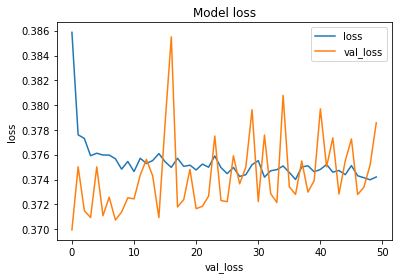

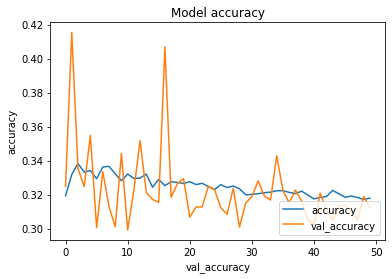

In [145]:
plt.plot(lr_history.history['loss'])
plt.plot(lr_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

plt.plot(lr_history.history['accuracy'])
plt.plot(lr_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

In [146]:
# decision tree

dec_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 10).fit(X_train, y_train)
dec_tree_pred = dec_tree.predict(X_test)
print("Decision tree prediction is"); roc_auc_score(y_test, dec_tree_pred)

Decision tree prediction is


0.7227813991602156

In [147]:
# random forest

ran_for = RandomForestClassifier(criterion='entropy', max_depth = 30).fit(X_train, y_train)
ran_for_pred = ran_for.predict(X_test)
print("Random forest prediction is"); roc_auc_score(y_test, ran_for_pred)

Random forest prediction is


0.738243049694612

In [148]:
# deep neural network

model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
deep_history = model.fit(X_train, y_train, epochs=50,  validation_data=(X_test, y_test))

Train on 18694 samples, validate on 8013 samples
Epoch 1/50
18694/18694 [==============================] - 1s 67us/step - loss: 0.6356 - accuracy: 0.6264 - val_loss: 0.6394 - val_accuracy: 0.6257
Epoch 2/50
18694/18694 [==============================] - 1s 57us/step - loss: 0.6253 - accuracy: 0.6310 - val_loss: 0.6231 - val_accuracy: 0.6325
Epoch 3/50
18694/18694 [==============================] - 1s 57us/step - loss: 0.6222 - accuracy: 0.6326 - val_loss: 0.6234 - val_accuracy: 0.6351
Epoch 4/50
18694/18694 [==============================] - 1s 57us/step - loss: 0.6220 - accuracy: 0.6316 - val_loss: 0.6252 - val_accuracy: 0.6335
Epoch 5/50
18694/18694 [==============================] - 1s 57us/step - loss: 0.6205 - accuracy: 0.6335 - val_loss: 0.6221 - val_accuracy: 0.6316
Epoch 6/50
18694/18694 [==============================] - 1s 56us/step - loss: 0.6197 - accuracy: 0.6329 - val_loss: 0.6246 - val_accuracy: 0.6304
Epoch 7/50
18694/18694 [==============================] - 1s 57us/ste

In [149]:
deep_model_pred = model.predict(X_test)
print("Deep Neural Model Prediction is"); roc_auc_score(y_test, deep_model_pred)

Deep Neural Model Prediction is


0.637586778848911

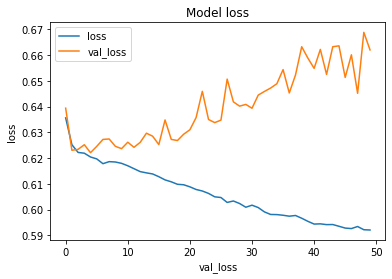

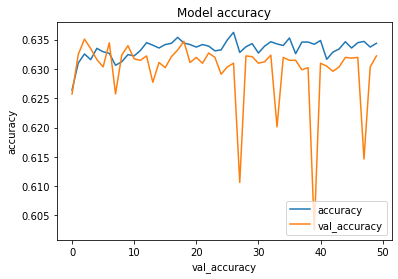

In [150]:
plt.plot(deep_history.history['loss'])
plt.plot(deep_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('val_loss')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

plt.plot(deep_history.history['accuracy'])
plt.plot(deep_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')
plt.legend(['accuracy', 'val_accuracy'], loc='lower right')
plt.show()

In [0]:
data_dum = pd.merge(train_feature, train_label,left_index=True, right_index=True)
res = data_dum[["h1n1_vaccine","seasonal_vaccine"]]
res.to_csv('nan.csv', index=True)
